In [1]:
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from mindstorm import statplot
from tesser import tasks
from tesser import figures

main_dir = os.environ['TESSER_DIR']
data_dir = os.path.join(main_dir, 'Data')
fig_dir = os.path.join(main_dir, 'Figures', 'plots')

In [2]:
induct = tasks.load_induct(data_dir)
induct.head()

,subject,trial,trial_type,environment,community,cue,opt1,opt2,within,response,response_time,correct
0,100,1,central,ocean,1,2,16,20,2,NaN,NaN,NaN
1,100,2,boundary2,desert,2,4,10,19,1,2.0,2.974157,0.0
2,100,3,central,desert,2,5,6,2,1,1.0,3.190848,1.0
3,100,4,central,ocean,1,2,9,19,2,2.0,3.373906,1.0
4,100,5,central,ocean,1,1,19,13,1,2.0,3.094699,0.0


In [3]:
bias = (induct.groupby(['subject', 'trial_type'])[['correct']].mean() - .5) * 2
bias = bias.reset_index()

In [4]:
dark = sns.blend_palette(
    [
        np.array([20, 125, 201]) / 256, 
        np.array([0, 166, 161]) / 256, 
        np.array([15, 175, 75]) / 256,
    ], n_colors=3
)
dark

[(0.078125, 0.48828125, 0.78515625),
 (0.00022977941176470588, 0.6485753676470588, 0.6275888480392157),
 (0.05859375, 0.68359375, 0.29296875)]

In [5]:
light = sns.blend_palette(
    [
        np.array([171, 212, 237]) / 256, 
        np.array([172, 235, 242]) / 256, 
        np.array([165, 232, 177]) / 256,
    ], n_colors=3
)
light

[(0.66796875, 0.828125, 0.92578125),
 (0.6717677696078431, 0.9179227941176471, 0.9443167892156863),
 (0.64453125, 0.90625, 0.69140625)]

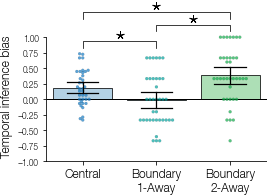

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))
statplot.plot_swarm_bar(
    bias,
    x='trial_type',
    y='correct',
    dark=dark,
    light=light,
    point_kws={'clip_on': False},
    ax=ax,
)
ax.set(
    ylim=(-1, 1), ylabel='Temporal inference bias',
    xticklabels=['Central', 'Boundary\n1-Away', 'Boundary\n2-Away']
)
x_lim = ax.get_xlim()
ax.hlines(0, *x_lim)
ax.set_xlim(*x_lim);
x = sorted([p.get_x() + p.get_width() / 2 for p in ax.patches])
y = bias.groupby('trial_type')['correct'].max().to_list()
offset = 0.05 * np.diff(ax.get_ylim())
ax.set(ylim=(-1, 1.6), yticks=np.arange(-1, 1.25, .25))
ax.spines['left'].set_bounds(-1, 1)
statplot.plot_sig([x[0], x[1]], [y[0], y[1]], offset, ax=ax)
statplot.plot_sig([x[1], x[2]], [y[1], y[2]], offset, ax=ax)
statplot.plot_sig([x[0], x[2]], [y[0] + offset * 2, y[2] + offset * 2], offset, ax=ax)
ax.yaxis.set_label_coords(-.15, 0.4)
fig.savefig(os.path.join(fig_dir, 'temporal_bias.pdf'))

In [7]:
pg.rm_anova(data=bias, dv='correct', within='trial_type', subject='subject')

,Source,ddof1,ddof2,F,p-unc,np2,eps
0,trial_type,2,72,14.270354,0.000006,0.283872,0.88351


In [8]:
pg.pairwise_ttests(data=bias, dv='correct', within='trial_type', subject='subject', padjust='fdr_bh')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,p-corr,p-adjust,BF10,hedges
0,trial_type,boundary1,boundary2,True,True,-4.735596,36.0,two-sided,0.000034,0.000101,fdr_bh,669.792,-0.909924
1,trial_type,boundary1,central,True,True,-3.297114,36.0,two-sided,0.002204,0.003306,fdr_bh,15.542,-0.546255
2,trial_type,boundary2,central,True,True,2.581411,36.0,two-sided,0.014059,0.014059,fdr_bh,3.14,0.528246


In [9]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.11.1

mindstorm : 0.8.0
matplotlib: 3.1.3
pingouin  : 0.3.11
seaborn   : 0.11.1
scipy     : 1.4.1
numpy     : 1.18.1
tesser    : 0.1.0

